In [2]:
from sklearn.datasets import make_blobs
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
data, target = make_blobs(n_samples = 1000, n_features = 3, random_state = 90)

In [4]:
data = pd.DataFrame(data)
data

,0,1,2
0,-5.517762,1.821899,-4.226280
1,-5.685490,0.871092,-6.333012
2,-5.793959,-5.050116,10.326174
3,-3.340801,2.150790,-4.443899
4,7.009923,-4.239821,-6.550498
...,...,...,...
995,7.873117,-4.038387,-2.681084
996,9.406836,-6.564141,-4.280198
997,-3.513328,2.733354,-5.517976
998,7.209013,-6.543205,-3.082948


In [5]:
fig = go.Figure(data = [go.Scatter3d(x=data.iloc[:,0],y=data.iloc[:,1],z=data.iloc[:,2],
                             mode='markers',
                             marker = dict(color = target, size = 5, colorscale='temps', line_width = 0.5,line_color='black'))])
fig.update_traces(projection_z_show=True, selector=dict(type='scatter3d'))
fig.update_layout(margin = dict(l=0,r=0,t=0,b=0), width = 700, height = 700)
fig.show()

In [6]:
x = np.linspace(0,50,50)
y = 3*x + 7 + np.random.uniform(-20,50,x.shape)
s = np.linspace(0.1,0.2,50)

In [7]:
fig = px.scatter(x = x, y = y, height = 500, width = 500, size = s)
fig.show()

In [8]:
!pip install kaggle

In [9]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.8 MB/s eta 0:00:00


Данные можно скачать двумя способами:

* Скачать данные с Kaggle, в Google Colab нажать слева значок папки и перетащить данные туда
* С помощью Kaggle API

In [10]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle #копия этого файла в эту папку
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download 'hellbuoy/car-price-prediction'

!unzip car-price-prediction.zip

Saving kaggle.json to kaggle.json
  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 24.8MB/s]
Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [11]:
data = pd.read_csv("CarPrice_Assignment.csv")
print(data.shape)
data.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Предобработка

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
data.drop('car_ID', axis = 1, inplace = True)

In [15]:
data.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
#выделим категориальные признаки и числовые
#метод select_dtypes возвращает подмножество столбцов фрейма данных на основе dtypes столбцов
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

10


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [17]:
for i in categorical_cols:
  print(data[i].value_counts())
  print()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

gas       185
diesel     20
Name: fueltype, dtype: int64

std      168
turbo     37
Name: aspiration, dtype: int64

four    115
two      90
Name: doornumber, dtype: int64

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

front    202
rear       3
Name: enginelocation, dtype: int64

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int6

In [18]:
data[data.enginelocation=='rear']

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


In [19]:
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

15


['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [20]:
#посмотрим, какое количество уникальных значений имеют категориальные признаки и числовые
unic_categ = pd.DataFrame([[i,data[i].nunique()] for i in categorical_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])

In [21]:
unic_categ

,column_name,num_unique
1,fueltype,2
2,aspiration,2
3,doornumber,2
6,enginelocation,2
5,drivewheel,3
4,carbody,5
7,enginetype,7
8,cylindernumber,7
9,fuelsystem,8
0,CarName,147


In [22]:
data.CarName.head(10) #имя в виде производитель + модель

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [23]:
data['company'] = [i.split()[0] for i in data.CarName.values]

In [24]:
data.drop('CarName',axis=1,inplace=True)

In [25]:
categorical_cols.append('company')
categorical_cols.remove('CarName')

In [26]:
data.company.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64

In [27]:
data["company"] = data["company"].replace(
    {
        "maxda": "mazda",
        "porcshce": "porsche",
        "Nissan": "nissan",
        "vokswagen": "volkswagen",
        "vw": "volkswagen",
        "toyouta": "toyota",
      }
)
data["company"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company, dtype: int64

In [28]:
unic_numer = pd.DataFrame([[i,data[i].nunique()] for i in numeric_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])

In [29]:
unic_numer

,column_name,num_unique
0,symboling,6
11,peakrpm,23
12,citympg,29
13,highwaympg,30
9,compressionratio,32
8,stroke,37
7,boreratio,38
3,carwidth,44
6,enginesize,44
4,carheight,49


In [30]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [31]:
categorical_cols.append('symboling')
numeric_cols.remove('symboling')

In [32]:
print(f'Кол-во категориальных признаков = {len(categorical_cols)}')
print(f'Кол-во числовых признаков = {len(numeric_cols)}')

Кол-во категориальных признаков = 11
Кол-во числовых признаков = 14


In [33]:
target_name = 'price'
numeric_cols.remove('price')

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_name, axis=1),
    data[target_name],
    test_size=0.3,
    random_state=1,
    shuffle=True
)

In [35]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(143, 24)
(143,)

(62, 24)
(62,)


In [36]:
#сделаем одну выборку с нормализованными численными признаками
X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]


In [37]:
X_train[categorical_cols], X_train[categorical_cols].shape

(    fueltype aspiration doornumber      carbody drivewheel enginelocation  \
 124      gas      turbo        two    hatchback        rwd          front   
 181      gas        std       four        wagon        rwd          front   
 154      gas        std       four        wagon        4wd          front   
 53       gas        std       four        sedan        fwd          front   
 94       gas        std        two        sedan        fwd          front   
 ..       ...        ...        ...          ...        ...            ...   
 133      gas        std       four        sedan        fwd          front   
 137      gas      turbo       four        sedan        fwd          front   
 72       gas        std        two  convertible        rwd          front   
 140      gas        std        two    hatchback        4wd          front   
 37       gas        std        two    hatchback        fwd          front   
 
     enginetype cylindernumber fuelsystem   company  symboling

In [38]:
# Кодирование категориальных признаков
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = encoder.fit_transform(X_train[categorical_cols]).astype(int)
X_test_cat = encoder.fit_transform(X_test[categorical_cols]).astype(int)

In [39]:
X_train_cat.shape, X_train_cat

((143, 11),
 array([[ 1,  1,  1, ...,  5, 14,  5],
        [ 1,  0,  0, ...,  4, 19,  1],
        [ 1,  0,  0, ...,  1, 19,  2],
        ...,
        [ 1,  0,  1, ...,  4,  3,  5],
        [ 1,  0,  1, ...,  1, 18,  4],
        [ 1,  0,  1, ...,  0,  6,  2]]))

In [40]:
col = numeric_cols+categorical_cols

In [41]:
#объеденим в один набор численные и категориальные признаки
X_train_new = pd.DataFrame(np.hstack([X_train_num, X_train_cat]), columns = col)
X_test_new = pd.DataFrame(np.hstack([X_test_num, X_test_cat]), columns = col)
X_train_new.shape, X_test_new.shape

((143, 24), (62, 24))

In [42]:
X_train_new

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company,symboling
0,95.9,173.2,66.3,50.2,2818.0,156.0,3.59,3.86,7.0,145.0,...,1.0,1.0,2.0,2.0,0.0,3.0,2.0,5.0,14.0,5.0
1,104.5,187.8,66.5,54.1,3151.0,161.0,3.27,3.35,9.2,156.0,...,0.0,0.0,4.0,2.0,0.0,0.0,3.0,4.0,19.0,1.0
2,95.7,169.7,63.6,59.1,2290.0,92.0,3.05,3.03,9.0,62.0,...,0.0,0.0,4.0,0.0,0.0,3.0,2.0,1.0,19.0,2.0
3,93.1,166.8,64.2,54.1,1945.0,91.0,3.03,3.15,9.0,68.0,...,0.0,0.0,3.0,1.0,0.0,3.0,2.0,1.0,9.0,3.0
4,94.5,165.3,63.8,54.5,1951.0,97.0,3.15,3.29,9.4,69.0,...,0.0,1.0,3.0,1.0,0.0,3.0,2.0,1.0,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,99.1,186.6,66.5,56.1,2695.0,121.0,3.54,3.07,9.3,110.0,...,0.0,0.0,3.0,1.0,0.0,3.0,2.0,4.0,17.0,4.0
139,99.1,186.6,66.5,56.1,2847.0,121.0,3.54,3.07,9.0,160.0,...,1.0,0.0,3.0,1.0,0.0,0.0,2.0,4.0,17.0,4.0
140,96.6,180.3,70.5,50.8,3685.0,234.0,3.46,3.10,8.3,155.0,...,0.0,1.0,0.0,2.0,0.0,5.0,0.0,4.0,3.0,5.0
141,93.3,157.3,63.8,55.7,2240.0,108.0,3.62,2.64,8.7,73.0,...,0.0,1.0,2.0,0.0,0.0,4.0,2.0,1.0,18.0,4.0


In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

for_plot = pd.concat([X_train_new,X_test_new],axis = 0)

X_test_new = pd.DataFrame(scaler.fit_transform(X_test_new),columns = col)
X_train_new = pd.DataFrame(scaler.transform(X_train_new),columns = col)

for_plot2 = pd.concat([X_train_new,X_test_new],axis = 0)

# Обучение линейной регрессии

In [44]:
X_train_new # нормализованные признаки

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company,symboling
0,-0.466448,0.051414,0.325590,-1.611433,0.578184,0.775558,1.042941,1.795679,-0.784380,1.438146,...,2.041241,0.968246,-0.688310,1.317631,0.0,1.055290,-0.176950,0.970673,0.764553,2.739964
1,0.927666,1.133730,0.421717,0.158070,1.191385,0.893934,-0.155897,0.080808,-0.258116,1.772553,...,-0.489898,-1.032796,1.821997,1.317631,0.0,-2.449780,1.194410,0.481391,1.694010,-0.744708
2,-0.498869,-0.208046,-0.972120,2.426662,-0.394099,-0.739663,-0.980099,-0.995189,-0.305958,-1.085106,...,-0.489898,-1.032796,1.821997,-2.482048,0.0,1.055290,-0.176950,-0.986456,1.694010,0.126460
3,-0.920345,-0.423026,-0.683740,0.158070,-1.029397,-0.763338,-1.055026,-0.591690,-0.305958,-0.902703,...,-0.489898,-1.032796,0.566843,-0.582209,0.0,1.055290,-0.176950,-0.986456,-0.164904,0.997628
4,-0.693396,-0.534223,-0.875993,0.339557,-1.018348,-0.621286,-0.605462,-0.120941,-0.210274,-0.872302,...,-0.489898,0.968246,0.566843,-0.582209,0.0,1.055290,-0.176950,-0.986456,0.392770,0.997628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.052292,1.044772,0.421717,1.065507,0.351686,-0.053079,0.855622,-0.860690,-0.234195,0.374124,...,-0.489898,-1.032796,0.566843,-0.582209,0.0,1.055290,-0.176950,0.481391,1.322227,1.868796
139,0.052292,1.044772,0.421717,1.065507,0.631586,-0.053079,0.855622,-0.860690,-0.305958,1.894155,...,2.041241,-1.032796,0.566843,-0.582209,0.0,-2.449780,-0.176950,0.481391,1.322227,1.868796
140,-0.352973,0.577745,2.344251,-1.339201,2.174716,2.622233,0.555913,-0.759815,-0.473406,1.742152,...,-0.489898,0.968246,-3.198617,1.317631,0.0,3.392003,-2.919668,0.481391,-1.280252,2.739964
141,-0.887924,-1.127273,-0.875993,0.884019,-0.486171,-0.360858,1.155332,-2.306561,-0.377722,-0.750699,...,-0.489898,0.968246,-0.688310,-2.482048,0.0,2.223646,-0.176950,-0.986456,1.508119,1.868796


# Посмотрим на признаки

In [45]:
import statsmodels.api as sm

In [46]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

X_train = pd.DataFrame(X_train_new)
X_test = pd.DataFrame(X_test_new)

X_train_const = sm.add_constant(pd.DataFrame(X_train_new), prepend = False)
X_test_const = sm.add_constant(pd.DataFrame(X_test_new), prepend = False)

In [47]:
X_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company,symboling
0,-0.466448,0.051414,0.325590,-1.611433,0.578184,0.775558,1.042941,1.795679,-0.784380,1.438146,...,2.041241,0.968246,-0.688310,1.317631,0.0,1.055290,-0.176950,0.970673,0.764553,2.739964
1,0.927666,1.133730,0.421717,0.158070,1.191385,0.893934,-0.155897,0.080808,-0.258116,1.772553,...,-0.489898,-1.032796,1.821997,1.317631,0.0,-2.449780,1.194410,0.481391,1.694010,-0.744708
2,-0.498869,-0.208046,-0.972120,2.426662,-0.394099,-0.739663,-0.980099,-0.995189,-0.305958,-1.085106,...,-0.489898,-1.032796,1.821997,-2.482048,0.0,1.055290,-0.176950,-0.986456,1.694010,0.126460
3,-0.920345,-0.423026,-0.683740,0.158070,-1.029397,-0.763338,-1.055026,-0.591690,-0.305958,-0.902703,...,-0.489898,-1.032796,0.566843,-0.582209,0.0,1.055290,-0.176950,-0.986456,-0.164904,0.997628
4,-0.693396,-0.534223,-0.875993,0.339557,-1.018348,-0.621286,-0.605462,-0.120941,-0.210274,-0.872302,...,-0.489898,0.968246,0.566843,-0.582209,0.0,1.055290,-0.176950,-0.986456,0.392770,0.997628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.052292,1.044772,0.421717,1.065507,0.351686,-0.053079,0.855622,-0.860690,-0.234195,0.374124,...,-0.489898,-1.032796,0.566843,-0.582209,0.0,1.055290,-0.176950,0.481391,1.322227,1.868796
139,0.052292,1.044772,0.421717,1.065507,0.631586,-0.053079,0.855622,-0.860690,-0.305958,1.894155,...,2.041241,-1.032796,0.566843,-0.582209,0.0,-2.449780,-0.176950,0.481391,1.322227,1.868796
140,-0.352973,0.577745,2.344251,-1.339201,2.174716,2.622233,0.555913,-0.759815,-0.473406,1.742152,...,-0.489898,0.968246,-3.198617,1.317631,0.0,3.392003,-2.919668,0.481391,-1.280252,2.739964
141,-0.887924,-1.127273,-0.875993,0.884019,-0.486171,-0.360858,1.155332,-2.306561,-0.377722,-0.750699,...,-0.489898,0.968246,-0.688310,-2.482048,0.0,2.223646,-0.176950,-0.986456,1.508119,1.868796


In [48]:
def score (x, y, model):
  pred_lr = model.predict(x)
  r2 = r2_score(y, pred_lr)
  mae = mean_absolute_error(y, pred_lr)
  return [mae, round(r2, 4)]

In [49]:
np.random.seed(42)
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train, y_train)
print(score(X_train,y_train,model_lr))
print(score(X_test,y_test,model_lr))

[1714.6475314562122, 0.9203]
[2193.5034110413435, 0.8292]


In [50]:
import scipy.stats
params = np.append(model_lr.intercept_,model_lr.coef_)
predictions = model_lr.predict(X_train)

newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
MSE = mean_squared_error(y_train, predictions)

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-scipy.stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]


sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3.index,myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [newX.columns,params,sd_b,ts_b,p_values]
print(myDF3.sort_values(by='Probabilities'))

                  Coefficients  Standard Errors  t values  Probabilities
Constant            12092.5501          464.573    26.029          0.000
enginesize           3576.7311          727.036     4.920          0.000
enginelocation      11604.7347         1901.401     6.103          0.000
company             -1125.9351          208.342    -5.404          0.000
stroke               -687.0489          229.642    -2.992          0.003
carbody              -748.1527          305.588    -2.448          0.016
carheight             695.6116          287.916     2.416          0.017
doornumber           -759.1858          334.672    -2.268          0.025
carwidth             1288.1194          595.757     2.162          0.033
peakrpm               745.5767          380.900     1.957          0.053
curbweight           1328.7141          815.774     1.629          0.106
wheelbase            1040.2585          667.005     1.560          0.122
drivewheel            434.1703          295.419    

In [51]:
model = sm.OLS(y_train.values.reshape(-1,1),X_train_const)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     56.80
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.32e-53
Time:                        13:10:19   Log-Likelihood:                -1307.9
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     118   BIC:                             2740.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         1040.2585    734.271  

In [52]:
res_p = res.pvalues.sort_values()
res_p

const               1.377686e-46
enginelocation      1.831202e-07
company             2.965597e-06
enginesize          1.815517e-05
stroke              7.563237e-03
carbody             2.805437e-02
carheight           3.014396e-02
doornumber          4.153570e-02
carwidth            5.187165e-02
peakrpm             7.796439e-02
curbweight          1.416536e-01
wheelbase           1.591984e-01
drivewheel          1.844321e-01
horsepower          2.086553e-01
carlength           2.135725e-01
symboling           3.987015e-01
cylindernumber      4.545777e-01
compressionratio    4.786735e-01
enginetype          4.807675e-01
aspiration          5.265007e-01
boreratio           5.851492e-01
citympg             6.502516e-01
fueltype            7.075616e-01
highwaympg          8.148977e-01
fuelsystem          8.218721e-01
dtype: float64

In [53]:
scores = []
for i in range (1,len(res_p)+1):
  X = X_train_const[res_p.index[:i]]
  X_t = X_test_const[res_p.index[:i]]
  np.random.seed(42)
  model = sm.OLS(y_train.values.reshape(-1,1),X)
  res = model.fit(method='qr')
  for_test = score(X_t,y_test,res)

  model_lr = LassoCV(fit_intercept=False, alphas=np.arange(15,50))
  model_lr.fit(X, y_train)
  for_test2 = score(X_t,y_test,model_lr)

  print('statsmodels Тренировка: ', round(res.rsquared,4), 'Тест: ', for_test[1])
  print('sklearn Тренировка: ', round(model_lr.score(X,y_train),4), 'Тест: ', for_test2[1])

  scores.append(round(model_lr.score(X,y_train),4))

statsmodels Тренировка:  -0.0 Тест:  -0.0147
sklearn Тренировка:  -0.0 Тест:  -0.0142
statsmodels Тренировка:  0.1458 Тест:  -0.004
sklearn Тренировка:  0.1456 Тест:  -0.004
statsmodels Тренировка:  0.216 Тест:  0.0733
sklearn Тренировка:  0.2158 Тест:  0.0732
statsmodels Тренировка:  0.8174 Тест:  0.7687
sklearn Тренировка:  0.8172 Тест:  0.7685
statsmodels Тренировка:  0.8232 Тест:  0.7858
sklearn Тренировка:  0.823 Тест:  0.7857
statsmodels Тренировка:  0.8265 Тест:  0.7809
sklearn Тренировка:  0.8263 Тест:  0.7817
statsmodels Тренировка:  0.8444 Тест:  0.7689
sklearn Тренировка:  0.8442 Тест:  0.7699
statsmodels Тренировка:  0.8461 Тест:  0.765
sklearn Тренировка:  0.8459 Тест:  0.7663
statsmodels Тренировка:  0.8968 Тест:  0.8047
sklearn Тренировка:  0.8966 Тест:  0.8056
statsmodels Тренировка:  0.9012 Тест:  0.8162
sklearn Тренировка:  0.901 Тест:  0.8173
statsmodels Тренировка:  0.9093 Тест:  0.8344
sklearn Тренировка:  0.9091 Тест:  0.8353
statsmodels Тренировка:  0.9096 Тест: 

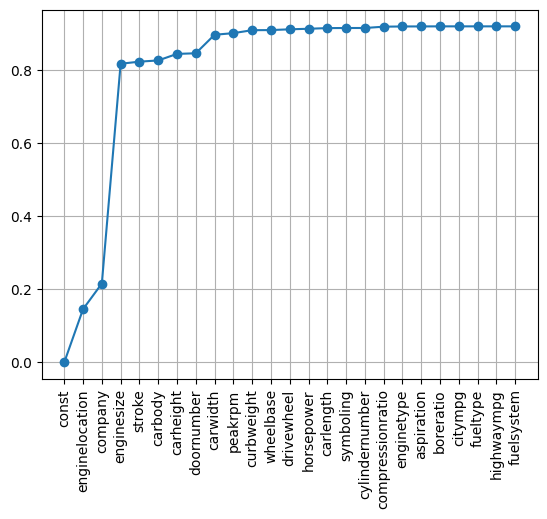

In [54]:
plt.grid()
plt.plot(res_p.index[0:],scores,'-o')
plt.xticks(rotation=90)
plt.show()

In [55]:
res_05 = res_p[res_p<0.1]
print(res_05)

const             1.377686e-46
enginelocation    1.831202e-07
company           2.965597e-06
enginesize        1.815517e-05
stroke            7.563237e-03
carbody           2.805437e-02
carheight         3.014396e-02
doornumber        4.153570e-02
carwidth          5.187165e-02
peakrpm           7.796439e-02
dtype: float64


In [56]:
best_col = res_05.index
c = 0
if 'const' in best_col:
  c = 1
  best_col=best_col.drop('const')
best_col

Index(['enginelocation', 'company', 'enginesize', 'stroke', 'carbody',
       'carheight', 'doornumber', 'carwidth', 'peakrpm'],
      dtype='object')

In [57]:
X_train_best = X_train[best_col]
X_test_best = X_test[best_col]

In [58]:
np.random.seed(42)
model_lr = LinearRegression(fit_intercept=bool(c))
model_lr.fit(X_train_best, y_train)
print(score(X_train_best,y_train,model_lr))
print(score(X_test_best,y_test,model_lr))

[1917.1261607354838, 0.9012]
[2339.083284865085, 0.8162]


In [59]:
lasso_reg = pd.Series(np.append(model_lr.coef_,model_lr.intercept_), index = np.append(model_lr.feature_names_in_,'const'))
lasso_reg.sort_values()

company           -1055.861514
carbody            -657.559730
stroke             -580.175729
doornumber         -456.248125
peakrpm             704.463740
carheight           768.709416
carwidth           2595.253532
enginesize         4761.547775
const             12433.701914
enginelocation    13638.367823
dtype: float64

# SHAP значения

In [60]:
from xgboost import XGBRFRegressor                 # градиентный бустинг
from sklearn.ensemble import (
    AdaBoostRegressor,                             # адаптивный бустинг
    RandomForestRegressor,                         # бэггинг
)

In [61]:
np.random.seed(1)
model_lr = LassoCV(alphas=np.arange(10,50), fit_intercept=bool(c))
model_lr.fit(X_train_new, y_train)
print(score(X_test, y_test, model_lr))

[2129.6457372241957, 0.8378]


In [62]:
lasso_reg = pd.Series(np.abs(np.append(model_lr.coef_,model_lr.intercept_)), index = np.append(model_lr.feature_names_in_,'const'))
lasso_param = lasso_reg.sort_values()
lasso_param

highwaympg              0.000000
fueltype                0.000000
fuelsystem             36.785560
citympg                40.141922
boreratio             102.117000
aspiration            116.841165
enginetype            179.785274
cylindernumber        181.470093
symboling             234.779422
drivewheel            405.011177
carlength             501.951208
doornumber            670.426111
stroke                685.479332
carheight             708.973952
compressionratio      740.242842
peakrpm               743.041575
wheelbase             748.622974
carbody               763.834559
horsepower           1133.615148
company              1150.921651
curbweight           1154.257076
carwidth             1216.398628
enginesize           3456.674685
enginelocation      10346.583043
const               12135.211765
dtype: float64

In [63]:
np.random.seed(42)

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
results = [score(X_test,y_test,model_linear_regression)]

model_xdb = XGBRFRegressor(device= "gpu", output_margin=True).fit(X_train, y_train)
results.append(score(X_test,y_test,model_xdb))

model_forest = RandomForestRegressor().fit(X_train, y_train)
results.append(score(X_test,y_test,model_forest))

results.append(score(X_test,y_test,model_lr))

In [64]:
results = pd.DataFrame(results,index=['LinearRegression','XGBRFRegressor','RandomForestRegressor', 'LassoRegression'], columns=['MAE', 'R2'])

In [65]:
results.sort_values('R2')

,MAE,R2
LinearRegression,2193.503411,0.8292
LassoRegression,2129.645737,0.8378
RandomForestRegressor,1440.944848,0.9239
XGBRFRegressor,1409.026903,0.9288


In [66]:
from sklearn.inspection import permutation_importance

In [67]:
predictors_model_xdb =  pd.Series(model_xdb.feature_importances_, index=model_xdb.feature_names_in_)

predictors_forest =  pd.Series(model_forest.feature_importances_, index=model_xdb.feature_names_in_)

result = permutation_importance(model_forest, X_train, y_train, n_repeats=10,random_state=0)
predictors_forest_pi =  pd.Series(result.importances_mean, index=model_xdb.feature_names_in_)

predictors_linear_reg = pd.Series(np.append(np.abs(model_linear_regression.coef_[0]),model_linear_regression.intercept_), index=np.append(model_linear_regression.feature_names_in_,'const'))
print(predictors_linear_reg)

wheelbase            1040.258469
carlength            1061.877113
carwidth             1288.119359
carheight             695.611553
curbweight           1328.714073
enginesize           3576.731079
boreratio             171.762257
stroke                687.048877
compressionratio     1552.226484
horsepower            893.818106
peakrpm               745.576699
citympg               575.913499
highwaympg            271.423555
fueltype              888.804810
aspiration            274.157350
doornumber            759.185772
carbody               748.152684
drivewheel            434.170289
enginelocation      11604.734709
enginetype            150.962545
cylindernumber        251.232276
fuelsystem            107.532131
company              1125.935053
symboling             285.131352
const               12092.550138
dtype: float64


In [69]:
#ADD
from sklearn.feature_selection import SequentialFeatureSelector

model_lin_reg_ADD = LinearRegression()
model_lin_reg_ADD.fit(X_train, y_train)
sfs_forward = SequentialFeatureSelector(model_lin_reg_ADD, n_features_to_select='auto',direction='forward')
sfs_forward.fit(X_train, y_train)
print('Отобранные признаки с помощью forward-selection:')
print(sfs_forward.feature_names_in_[sfs_forward.get_support()])
print()

#DEL
model_lin_reg_ADD = LinearRegression()
model_lin_reg_ADD.fit(X_train, y_train)
sfs_backward = SequentialFeatureSelector(model_lin_reg_ADD, n_features_to_select='auto',direction='backward')
sfs_backward.fit(X_train, y_train)
print('Отобранные признаки с помощью backward-selection:')
print(sfs_backward.feature_names_in_[sfs_backward.get_support()])
print()

#Взаимная информация
from sklearn.feature_selection import mutual_info_regression
MI = mutual_info_regression(X_train, y_train)
print(MI)

Отобранные признаки с помощью forward-selection:
['carlength' 'carwidth' 'carheight' 'curbweight' 'enginesize' 'stroke'
 'peakrpm' 'doornumber' 'carbody' 'drivewheel' 'enginelocation' 'company']

Отобранные признаки с помощью backward-selection:
['wheelbase' 'carwidth' 'carheight' 'enginesize' 'stroke'
 'compressionratio' 'horsepower' 'peakrpm' 'doornumber' 'carbody'
 'enginelocation' 'company']

[0.48181148 0.47513165 0.68237609 0.23070677 0.77310652 0.73747445
 0.36760765 0.26351267 0.09071059 0.7532795  0.15368069 0.70941909
 0.87382283 0.         0.05237071 0.03057167 0.08990943 0.3125987
 0.00160016 0.20010056 0.32167294 0.43994203 0.27982705 0.18243388]


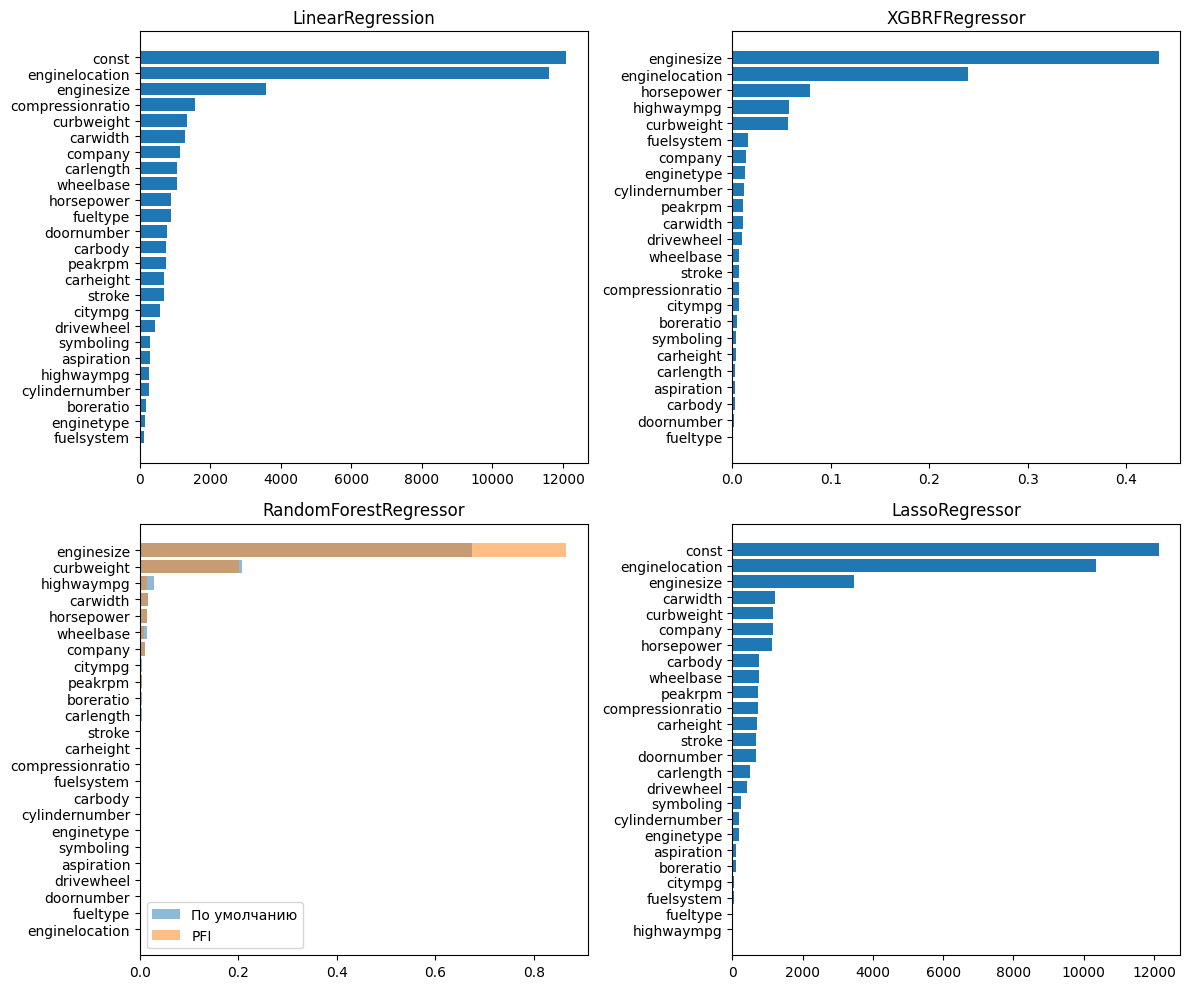

In [70]:
fig , ax = plt.subplots(2,2, figsize = (12,10))

ax[0][0].set_title('LinearRegression')
ax[0][0].barh(list(predictors_linear_reg.sort_values().keys()), predictors_linear_reg.sort_values())

ax[0][1].set_title('XGBRFRegressor')
ax[0][1].barh(list(predictors_model_xdb.sort_values().keys()), predictors_model_xdb.sort_values())

ax[1][0].set_title('RandomForestRegressor')
ax[1][0].barh(list(predictors_forest.sort_values().keys()), predictors_forest.sort_values(), alpha = 0.5, label = 'По умолчанию')
ax[1][0].barh(list(predictors_forest_pi.sort_values().keys()), predictors_forest_pi.sort_values(), alpha = 0.5, label = 'PFI')
ax[1][0].legend(loc='best')

ax[1][1].set_title('LassoRegressor')
ax[1][1].barh(list(lasso_param.sort_values().keys()), lasso_param.sort_values())

fig.tight_layout()
plt.show()

In [71]:
all_models = pd.concat([predictors_model_xdb,predictors_forest], axis = 1)
all_models.rename(columns = {0:'XGBRFRegressor',1:'RandomForest'}, inplace = True)
all_models.sort_values(by = 'XGBRFRegressor', inplace=True)

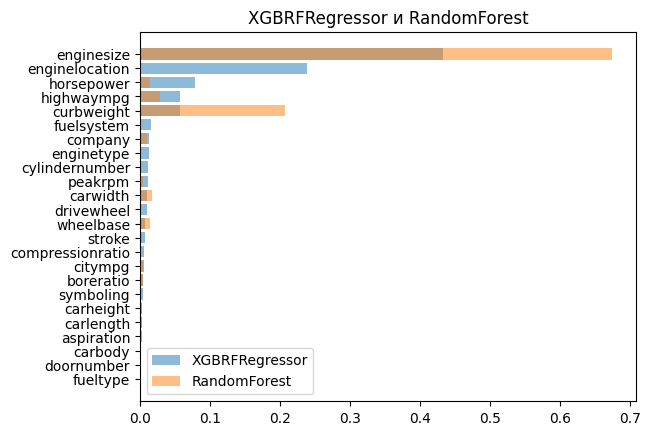

In [72]:
plt.barh(list(all_models.sort_values(by = 'XGBRFRegressor').index), all_models.sort_values(by = 'XGBRFRegressor').XGBRFRegressor.values, label = 'XGBRFRegressor', alpha = 0.5)
plt.barh(list(all_models.sort_values(by = 'XGBRFRegressor').index), all_models.sort_values(by = 'XGBRFRegressor').RandomForest.values, label = 'RandomForest', alpha = 0.5)
plt.title('XGBRFRegressor и RandomForest')
plt.legend()
plt.show()

In [73]:
import shap

Визуализация всех SHAP‑значений для каждого признака. По оси x этой диаграммы SHAP‑значения сгруппированы по признакам.

Каждая точка представляет собой одно SHAP-значение для предсказания и конкретного признака. Красный цвет точки соответствует высокой ценности объекта, синий — низкой. На основе распределения красных и синих точек мы можем получить представление о влиянии значений каждого конкретного признака.

In [74]:
#explainer = shap.explainers.Linear(model_linear_regression, X_train)

explainer = shap.Explainer(model_xdb)
shap_values = explainer(X_train)

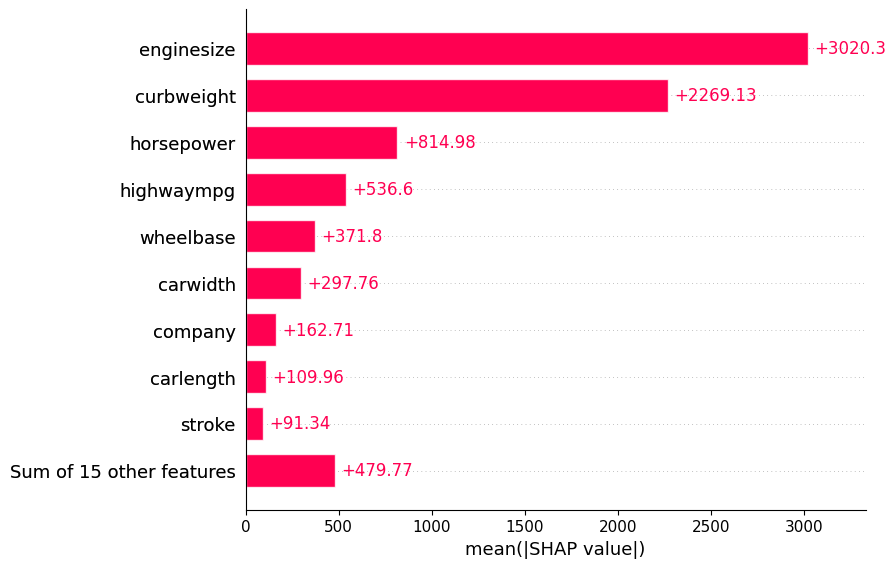

In [75]:
#plt.figure(dpi = 400)
shap.plots.bar(shap_values) #max_display=len(X_train.columns)

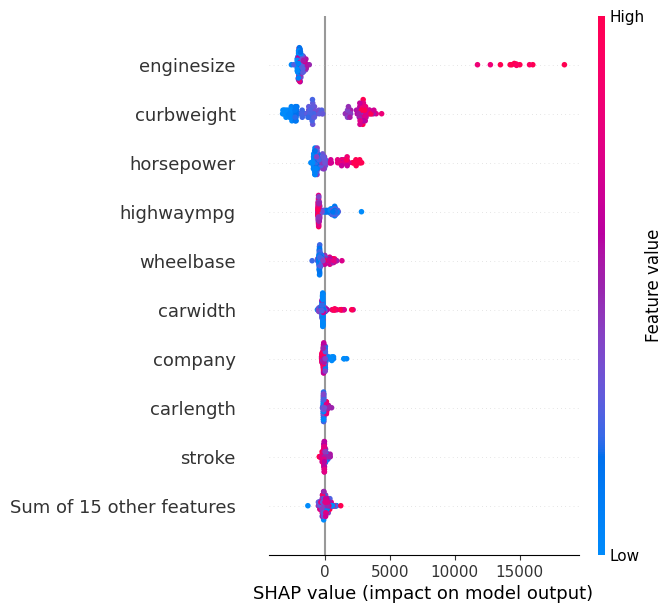

In [76]:
#plt.figure(dpi = 400)
shap.plots.beeswarm(shap_values,plot_size=[5,7]) # max_display=

Исследуя SHAP‑значения на этой диаграмме, мы можем начать понимать природу взаимоотношений между признаками и спрогнозированными ценами домов. Например, в случае с признаком MedInc, видно, что SHAP‑значения растут по мере роста значения признака. Это указывает на то, что более высокие значения MedInc соответствуют более высоким спрогнозированным ценам домов.

Видна тут и обратная ситуация, связанная с признаками Latitude и Longitude. Здесь — чем больше значения признаков — тем меньше SHAP‑значения. Это наблюдение указывает на то, что более высокие значения Latitude и Longitude связаны с более низкими спрогнозированными ценами домов.

Для того чтобы лучше понять взаимоотношения между отдельными значениями признаков и их SHAP‑значениями, можно создать диаграмму зависимости (shap.plots.scatter). Это — диаграмма, которая раскрывает взаимоотношения между SHAP‑значениями и значениями признаков для отдельных признаков.

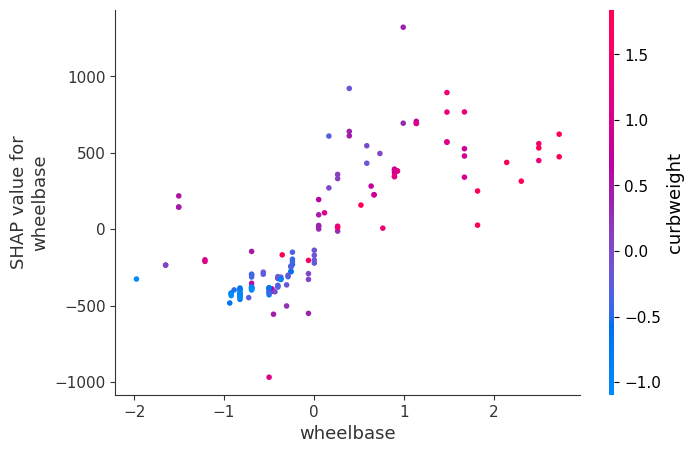

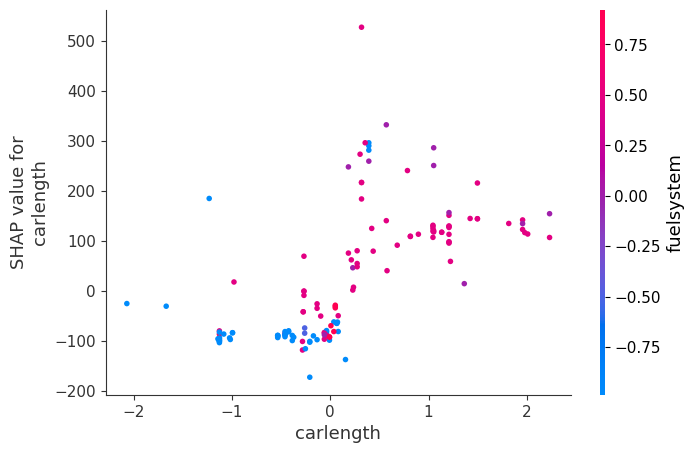

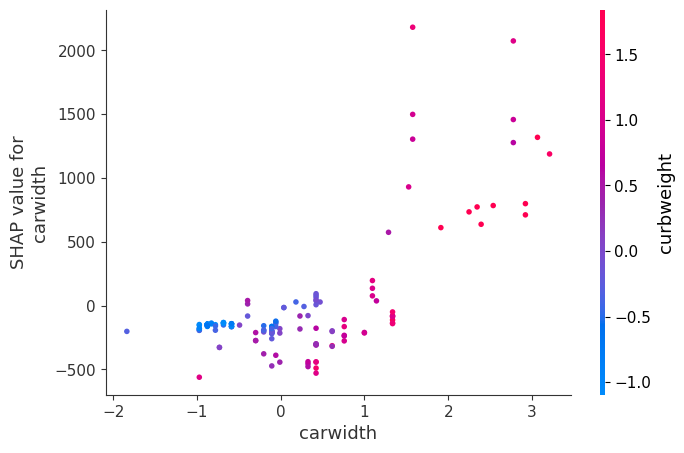

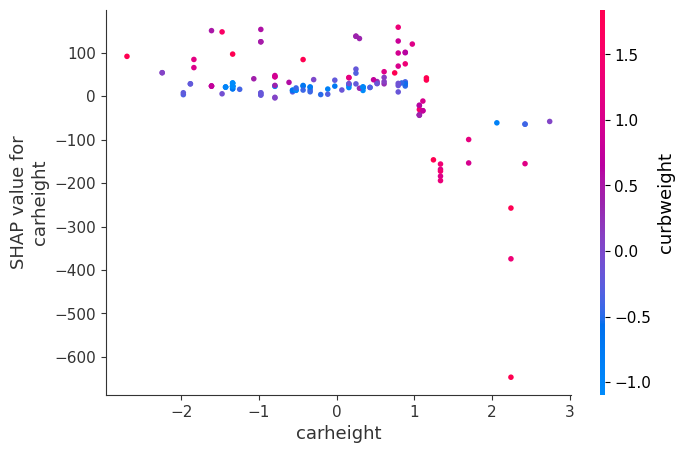

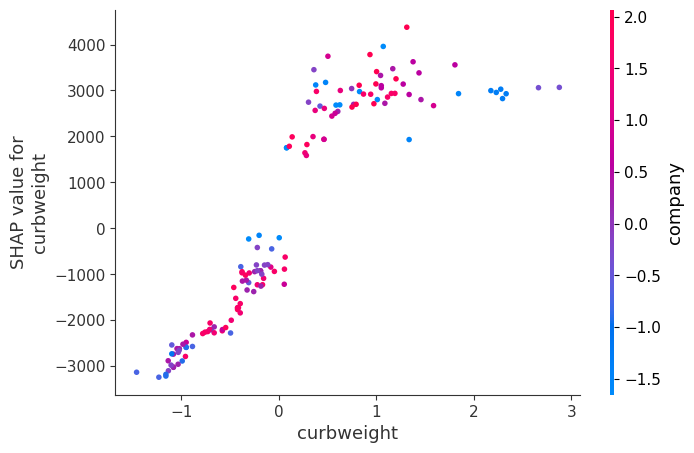

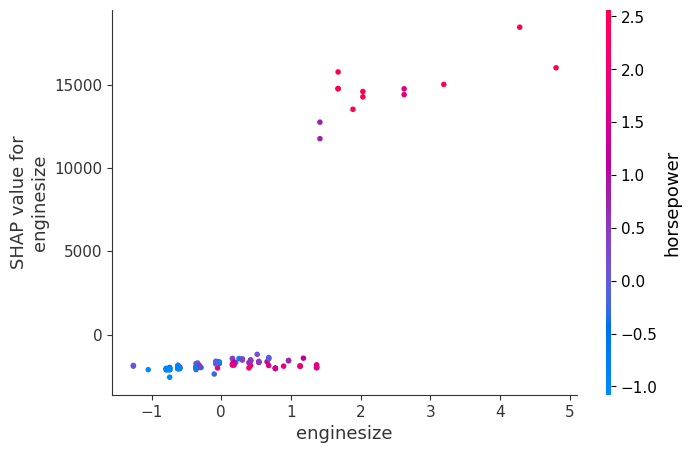

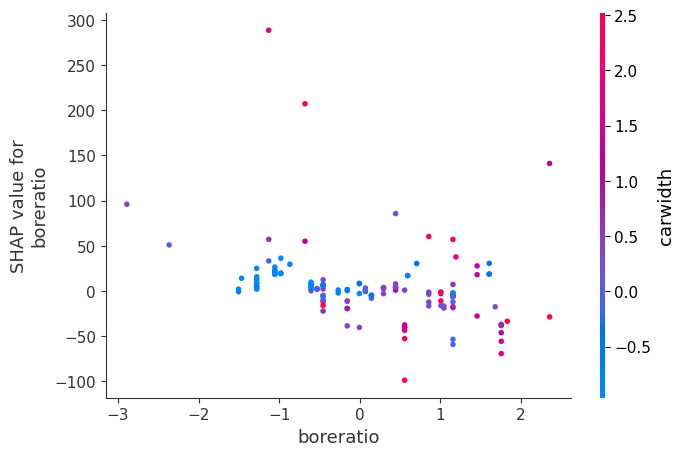

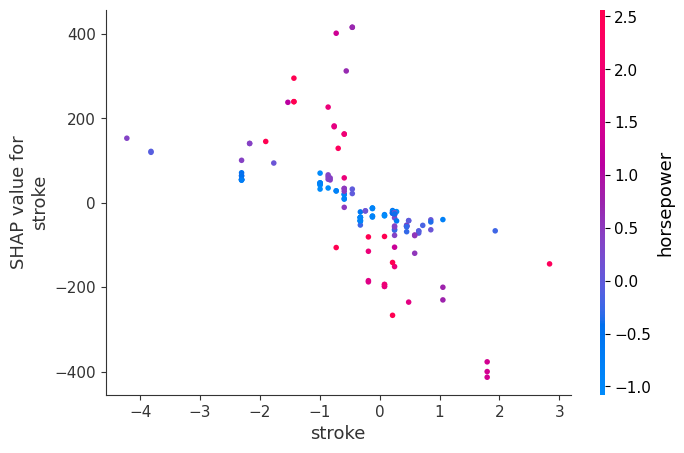

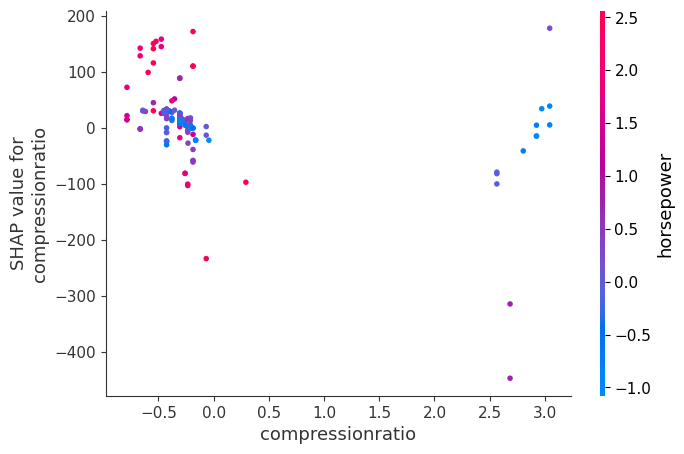

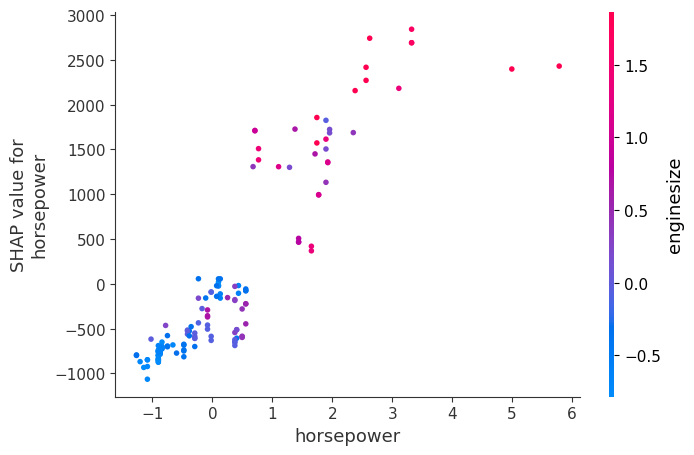

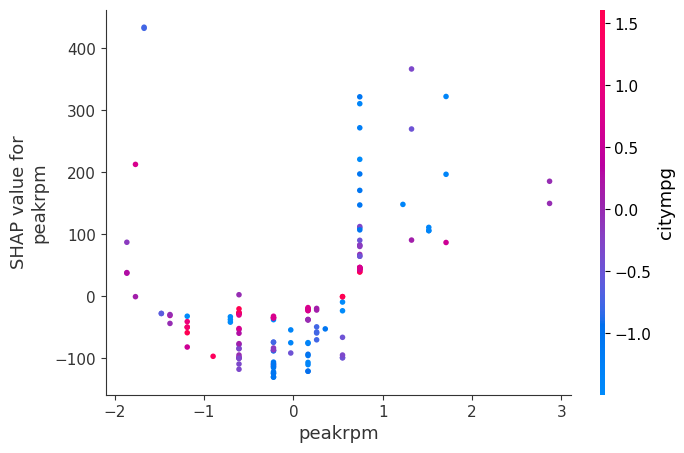

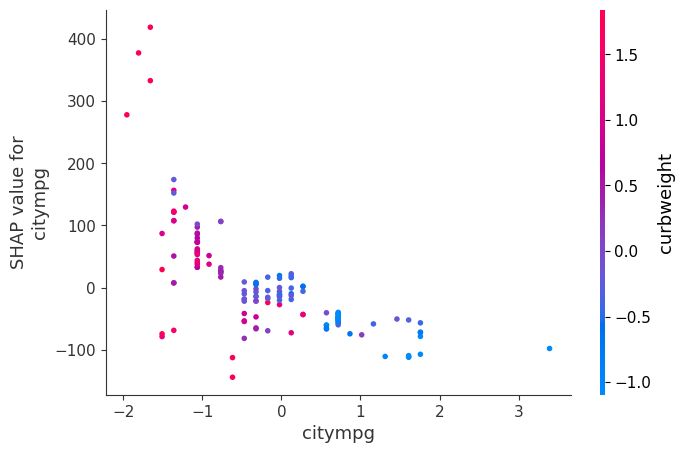

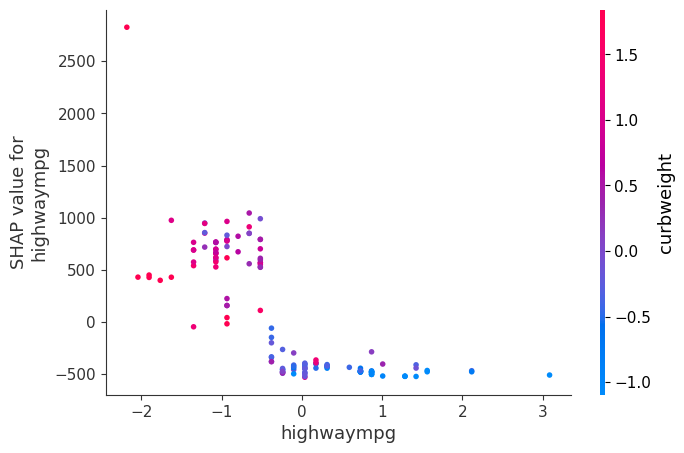

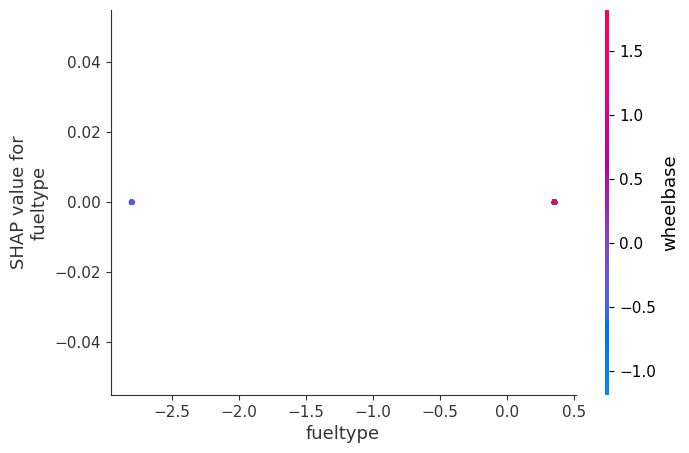

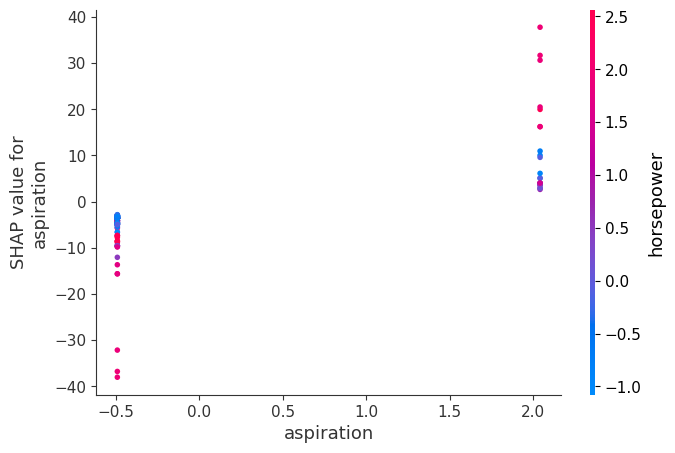

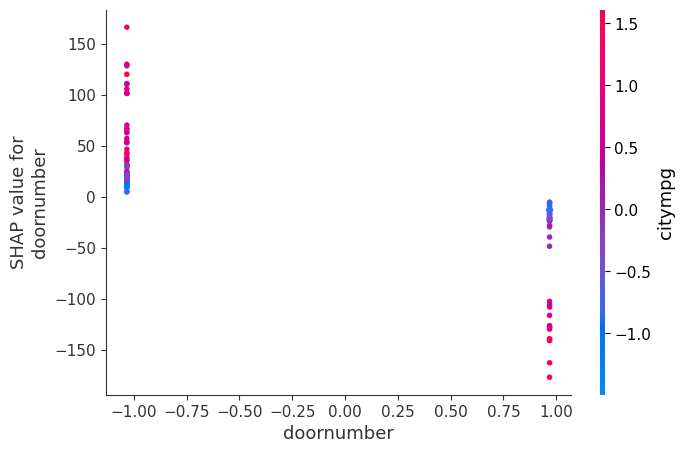

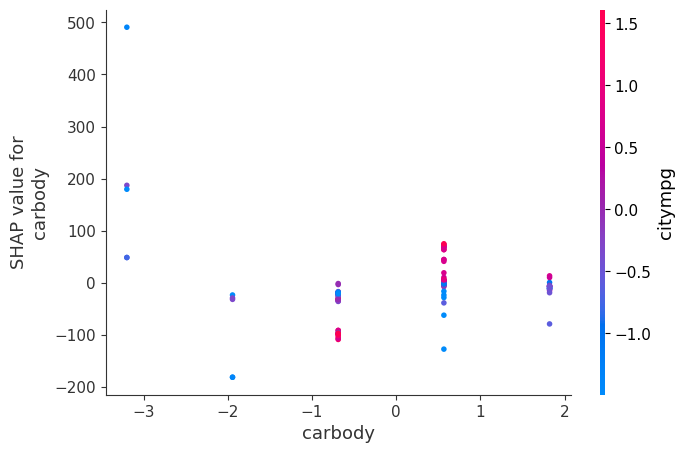

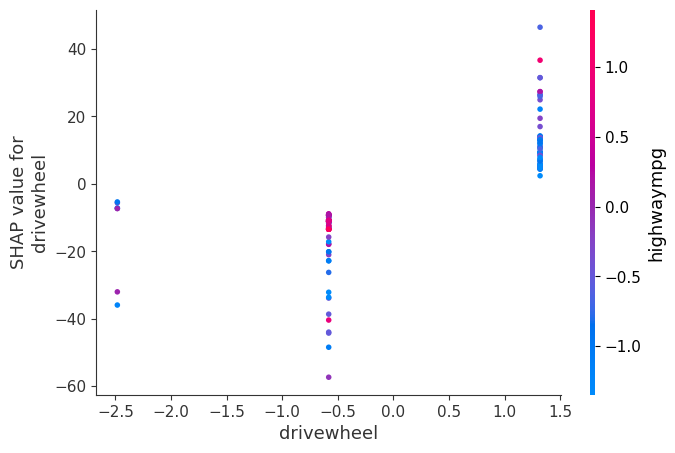

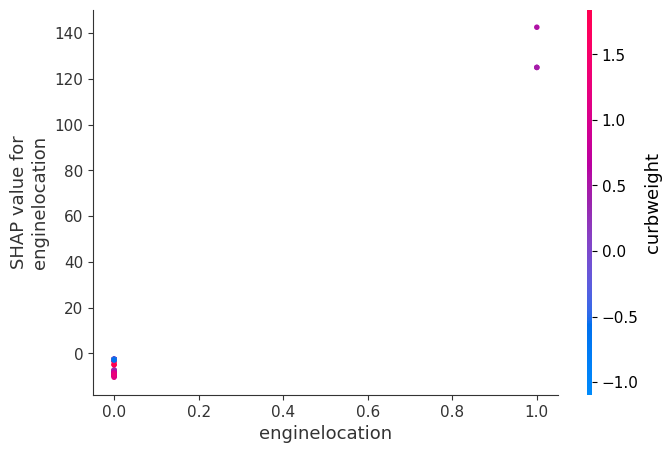

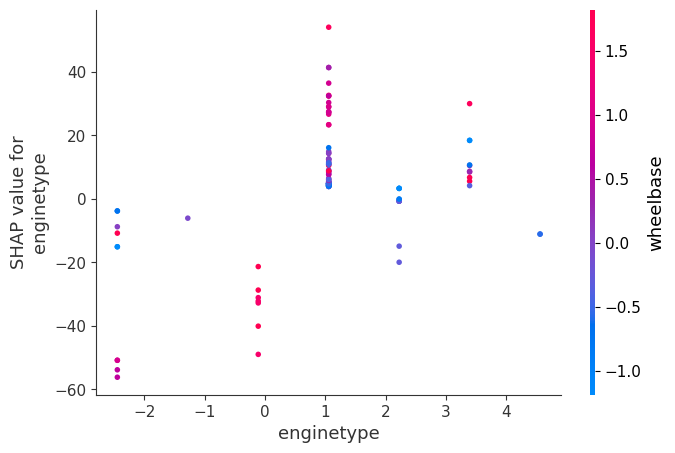

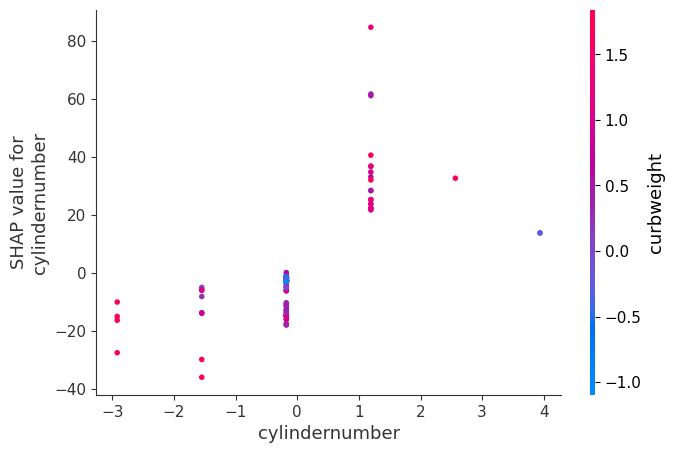

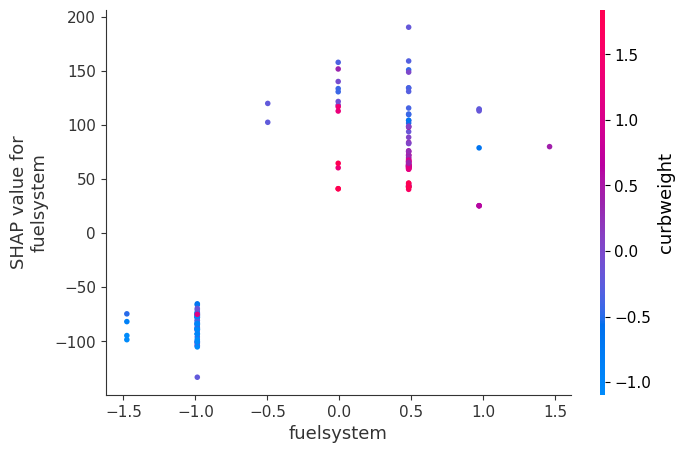

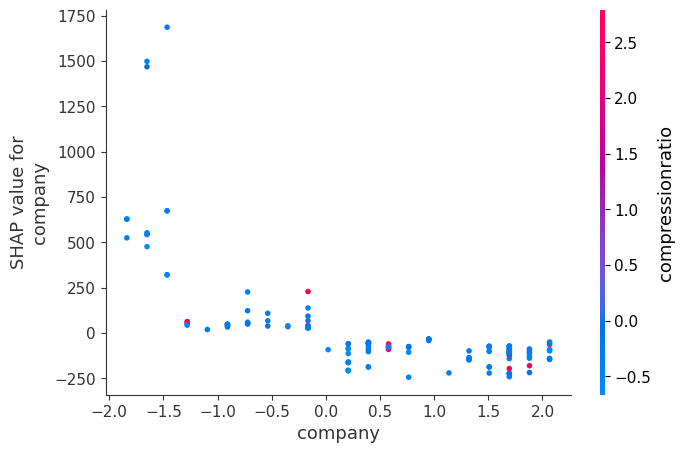

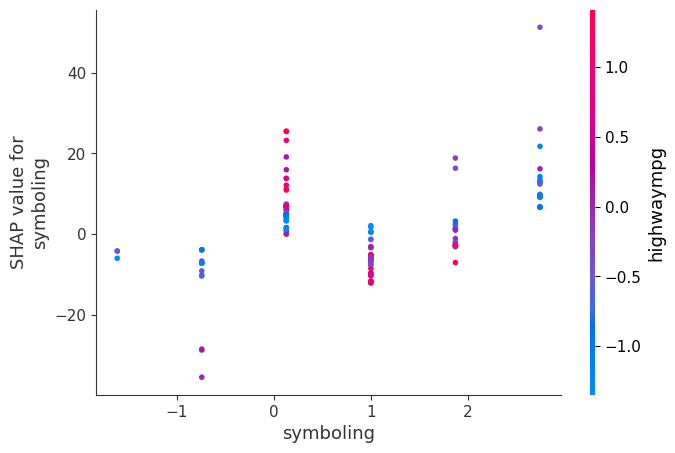

In [77]:
for feature in X_train.columns:
    shap.dependence_plot(feature, shap_values.values, X_train, display_features=X_train)

In [78]:
explainer.expected_value

13564.011

In [79]:
shap_values[0, :], X_train.iloc[0,:].values

(.values =
 array([ -405.73358  ,   -33.843464 ,  -479.1861   ,    23.2512   ,
         2503.1138   , -2039.8877   ,   -18.994772 ,  -413.4021   ,
           14.845968 ,   467.0625   ,  -129.98769  ,    73.0677   ,
          763.3483   ,     0.       ,     3.9930236,   -13.485032 ,
          -20.21115  ,    10.592579 ,    -9.594153 ,    10.896799 ,
           -2.915075 ,    25.38982  ,  -106.33659  ,     9.136782 ],
       dtype=float32)
 
 .base_values =
 13564.011
 
 .data =
 array([-0.46644771,  0.05141361,  0.3255904 , -1.61143253,  0.57818381,
         0.77555784,  1.04294085,  1.79567936, -0.78438003,  1.43814585,
        -0.22271847, -1.063663  , -1.07065641,  0.35675303,  2.04124145,
         0.96824584, -0.68830988,  1.31763054,  0.        ,  1.05528971,
        -0.17694958,  0.97067291,  0.76455325,  2.73996419]),
 array([-0.46644771,  0.05141361,  0.3255904 , -1.61143253,  0.57818381,
         0.77555784,  1.04294085,  1.79567936, -0.78438003,  1.43814585,
        -0.2227184

Степень влияния разных предикторов на целевую переменную для конкретного случая

In [80]:
shap.initjs() # для отображения интерактивного графика
shap.force_plot(explainer.expected_value, shap_values.values[100, :], X_train.iloc[100])

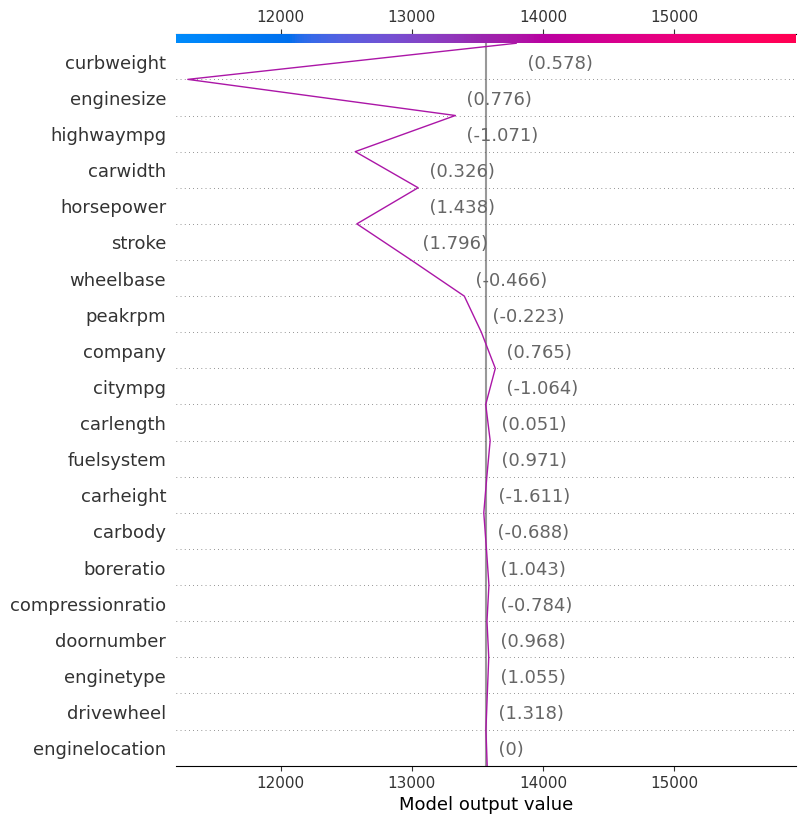

In [85]:
shap.decision_plot(explainer.expected_value, shap_values.values[0, :], X_train.iloc[0])

#PCA, t-SNE, UMAP

In [271]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=d19ccd030f5e297bb3551e710a41e998bb9da7819f7f89f249f3aefc20122fbc
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=29f8b325d930ce7bcd4bcd03b6c9f15072c83b8a0812c778d891181075f86fe1
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [272]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import umap

## PCA

In [273]:
X_train_for_pca = X_train
X_test_for_pca = X_test

In [274]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_for_pca)
X_test_pca = pca.transform(X_test_for_pca)
X_train_pca.shape

(143, 14)

In [275]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.29796822, 0.19103451, 0.09035235, 0.07383949, 0.06672821,
       0.04527039, 0.04468092, 0.03159767, 0.02845632, 0.02262972,
       0.02115454, 0.01826065, 0.0163095 , 0.01404967])

In [276]:
X_train_pca

array([[ 1.86250151,  3.00209781,  1.90745585, ..., -0.31281978,
        -0.28695922, -0.49922862],
       [ 2.85471249, -1.33181433, -0.51468547, ...,  0.56584694,
        -0.45118564, -0.2706714 ],
       [-2.55477894, -3.03070788, -2.18901436, ...,  0.89643371,
         0.59514415,  0.03936938],
       ...,
       [ 3.72208211,  4.30499204,  0.99797967, ...,  0.06225336,
        -0.66907935,  0.85842068],
       [-2.53765598,  0.42410715, -1.53222428, ...,  0.51014372,
         0.66656148, -0.32566942],
       [-1.86518867,  0.79487955,  0.37044097, ...,  0.83374562,
         0.42902822, -0.15820343]])

In [277]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_pca, y_train)
results = [score(X_test_pca,y_test,model_linear_regression)]
results

[[2267.3476156982847, 0.8325]]

## t-SNE

In [ ]:
mnist = load_digits(as_frame=True)
tsne = TSNE(n_components=3, perplexity=10, random_state=123)
tsne_features = tsne.fit_transform(mnist.data)
result_tsne = pd.DataFrame(tsne_features, columns = ['x','y','z'])
result_tsne

KeyboardInterrupt: ignored

In [ ]:
fig = go.Figure(data = [go.Scatter3d(x=result_tsne.x,y=result_tsne.y,z=result_tsne.z,
                             mode='markers',
                             marker = dict(color = mnist.target, size = 5, line_width = 0.5,line_color='black'))])
fig.update_layout(margin = dict(l=0,r=0,t=0,b=0), width = 700, height = 700)
fig.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity=10, random_state=123)
tsne_features = tsne.fit_transform(mnist.data)
result_tsne = pd.DataFrame(tsne_features, columns = ['x','y'])
fig = px.scatter(x = result_tsne.x, y = result_tsne.y, height = 700, width = 700, color=mnist.target)
fig.show()

## UMAP

In [ ]:
um = umap.UMAP(n_components=2,min_dist = 0.6,n_neighbors=30, random_state=123)
umap_features = um.fit_transform(mnist.data)
result_umap = pd.DataFrame(umap_features, columns = ['x','y'])
fig = px.scatter(x = result_umap.x, y = result_umap.y, height = 700, width = 700, color=mnist.target)
fig.show()